# Davis Franklin

## Research question/interests

**I would like to further investigate Apple's market capitalization by specifically looking at the effect that the release of a new iPhone has on Apple's market value.** I am interested in tech and specifically, apple products, and would like to see what iPhones were most beneficial to apple's market capitalization and which ones were not. I am going to answer this research question by using an additional dataset that includes every iPhone. This dataset will then allow me to obtain the specific date each iPhone was released, and with this imformation I can analyze the dataset of Apple's stock price and observed the characteristics of the stock value during these times.

## Imports:

In [415]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns

sns.set_theme(style="ticks", font_scale=1)
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

### Loading Data:

In [416]:
df_stocks = pd.read_csv("../data/raw/AAPL_stock.csv")
df_iPhone = pd.read_csv("../data/raw/iPhones.csv")

## Data Understanding:

### For df_stocks:

In [417]:
df_stocks.shape

(10443, 7)

In [418]:
df_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [419]:
df_stocks.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [420]:
df_stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000,1.044300e+04
mean,14.453559,14.611925,14.294785,14.458603,13.823986,3.314118e+08
std,31.337795,31.699692,30.979093,31.351249,31.046629,3.390498e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289063,0.275893,0.282891,0.235214,1.241298e+08
50%,0.472321,0.481429,0.464286,0.473214,0.389186,2.188788e+08
75%,14.445892,14.601071,14.297321,14.463393,12.409363,4.116770e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [421]:
df_stocks.describe(exclude=np.number)

,Date
count,10443
unique,10443
top,1980-12-12
freq,1


### For df_iPhone:

In [422]:
df_iPhone.shape

(37, 2)

In [423]:
df_iPhone.head()

,iPhone,Release_Date
0,iPhone 1st Gen,09/01/2007
1,iPhone 3G,09/05/2008
2,iPhone 3Gs,08/05/2009
3,iPhone 4,07/05/2010
4,iPhone 4S,4/10/2011


In [424]:
df_iPhone.dtypes

iPhone          object
Release_Date    object
dtype: object

In [425]:
df_iPhone.describe(exclude=np.number, datetime_is_numeric=True)

,iPhone,Release_Date
count,37,37
unique,37,19
top,iPhone 1st Gen,07/09/2022
freq,1,4


In [426]:
first_iPhone = df_iPhone['Release_Date'].min()
print(f"The first iPhone was released in: {first_iPhone}")

The first iPhone was released in: 07/05/2010


## Data Preperation:

##### In this step I converted the 'Date' column to be in datetime format, I renamed the columns to all be labeled in a consistent format (first letter of each word capitalize and underscores for spaces), and I checked if there was any null values for both datasets. After this step the data with be consistent and cleaned.

### For df_stocks

In [427]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

In [428]:
df_stocks = df_stocks.rename(columns={'Adj Close': 'Adj_Close'})
df_stocks.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [429]:
df_stocks.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [430]:
df_stocks['Change'] = df_stocks['Open'] - df_stocks['Close']

In [431]:
df_stocks.to_csv('../data/processed/APPL_processed_analysis1.csv')

### For df_iPhones:

In [432]:
df_iPhone['Release_Date'] = pd.to_datetime(df_iPhone['Release_Date'], format="%Y-%m-%d")
df_iPhone['Release_Date'] = pd.to_datetime(df_iPhone['Release_Date']).dt.date

ValueError: time data "09/01/2007" at position 0 doesn't match format specified

In [413]:
df_iPhone.columns

Index(['iPhone', 'Release_Date'], dtype='object')

In [414]:
df_stocks.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
Change       0
dtype: int64

In [353]:
df_iPhone.to_csv('../data/processed/iPhone_processed_analysis1.csv')

## Data Visualization:

### For df_stocks

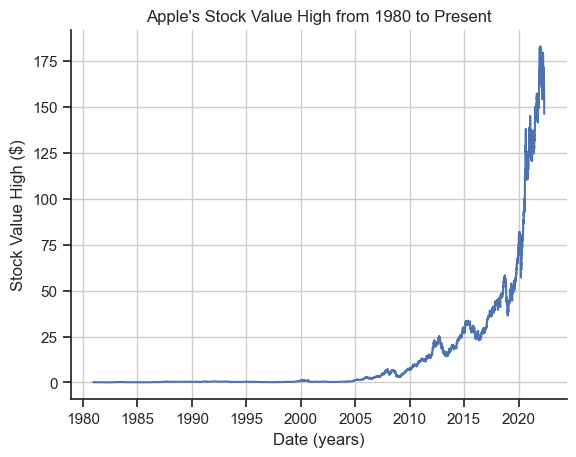

In [354]:
sns.lineplot(x='Date', y='High', data=df_stocks)
plt.title("Apple's Stock Value High from 1980 to Present")
plt.ylabel("Stock Value High ($)")
plt.xlabel("Date (years)")
plt.grid(True)
plt.show()

### Summary / Conclusion
##### This plot shows an overview of how Apple's stock value high has fluctuated over time. From this plot it is evident that the iPhone has not be detrimental to Apples stock value as it has increased since the release of the first iPhone in 2007. Also, it can be argued that the iPhone is benefitical to Apple's stock value because the stock value was low until the release of the first iPhone where the stock value began to increase rapidly. Further analysis is needed to look at specific time frames to conclude which iPhones were sucesses for Apple.

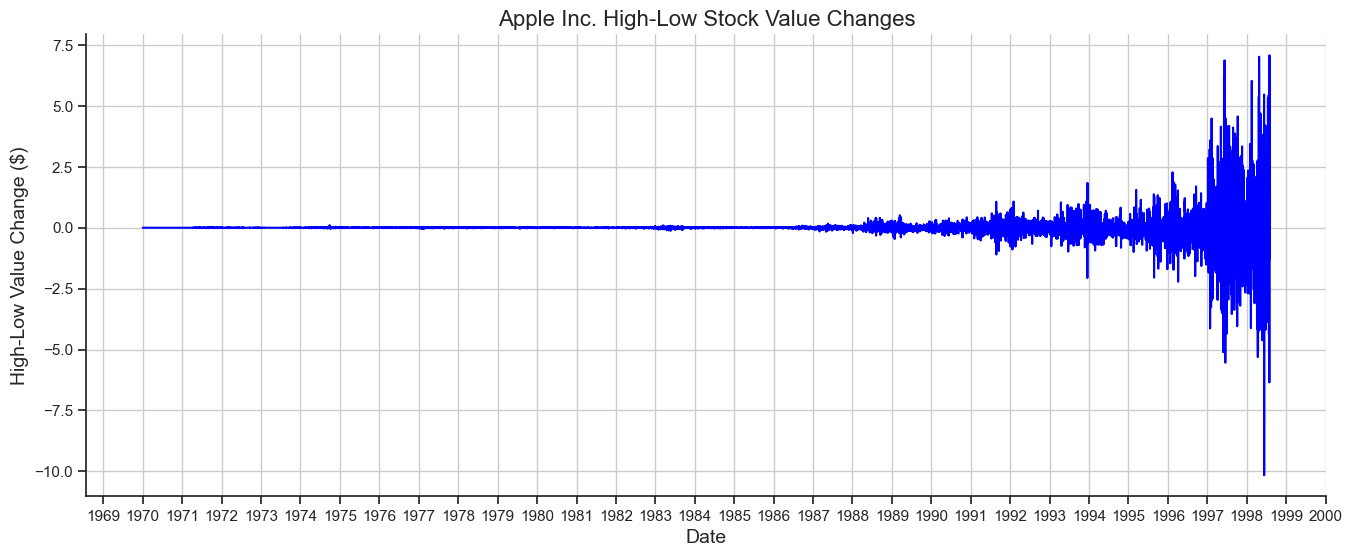

In [355]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_stocks['Change'], color='blue')
plt.title("Apple Inc. High-Low Stock Value Changes", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("High-Low Value Change ($)", fontsize=14)

years = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj_Close, Volume, Change]
Index: []
           Date      Open  High       Low     Close  Adj_Close     Volume  \
6997 2008-09-05  5.663929   5.8  5.630357  5.720714   4.891314  786884000   

        Change  
6997 -0.056785  
           Date      Open      High       Low     Close  Adj_Close     Volume  \
7227 2009-08-05  5.919643  5.978214  5.864643  5.896786   5.041857  423183600   

        Change  
7227  0.022857  
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj_Close, Volume, Change]
Index: []
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj_Close, Volume, Change]
Index: []
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj_Close, Volume, Change]
Index: []
           Date       Open      High        Low      Close  Adj_Close  \
8279 2013-10-09  17.308571  17.42107  17.081429  17.378214  15.278021   

         Volume    Change  
8279  301725200 -0.069643  
           Date   Open   High     Low  

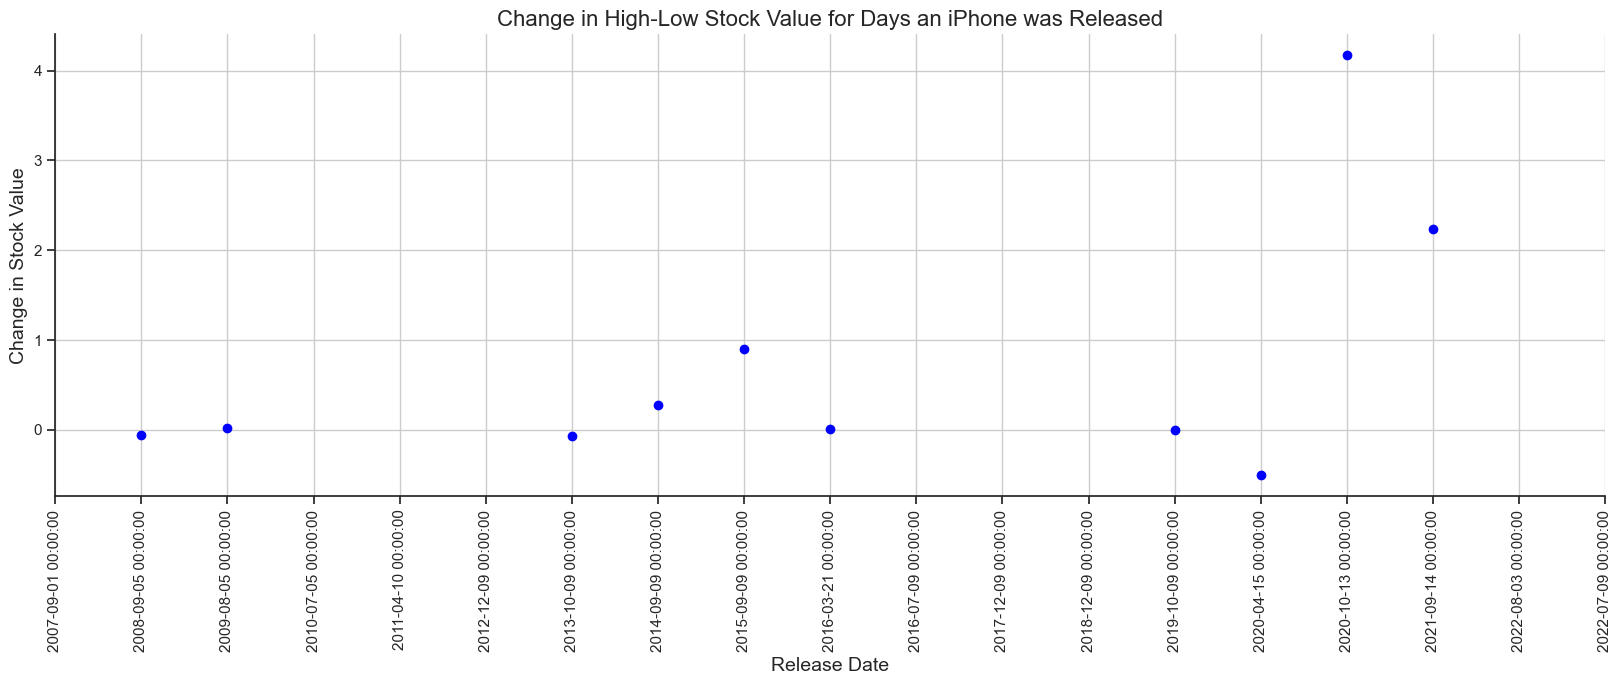

In [356]:
release_dates = []
for date in df_iPhone["Release_Date"]:
    if date not in release_dates:
        release_dates.append(date)

df_stocks_release = df_stocks.copy() 
df_stocks_release['Date'] = pd.to_datetime(df_stocks_release['Date'])  # convert to datetime
df_stocks_release = df_stocks_release[df_stocks_release['Date'].isin(release_dates)]

plt.figure(figsize=(20,6))
plt.title("Change in High-Low Stock Value for Days an iPhone was Released", fontsize=16)
plt.xlabel("Release Date", fontsize=14)
plt.ylabel("Change in Stock Value", fontsize=14)

for i, date in enumerate(release_dates):
    stock_data = df_stocks_release[df_stocks_release['Date'] == date]
    if stock_data.shape[0] > 0:
        plt.scatter(i, stock_data['Change'].values[0], color='blue')

plt.xticks(range(len(release_dates)), release_dates, rotation=90)

plt.grid(True)
plt.show()

In [357]:
date = release_dates[0]
stock_data = df_stocks_release[df_stocks_release['Date'] == date]
print(stock_data)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj_Close, Volume, Change]
Index: []


### Summary / Conclusion
##### This plot shows how much the stock value of Apple changed on the days that an iPhone was released. The far left point being the original iPhone, released in 2007, and the point on the far right being the iPhone 14 collection, released in 2022.

### For df_iPhone:

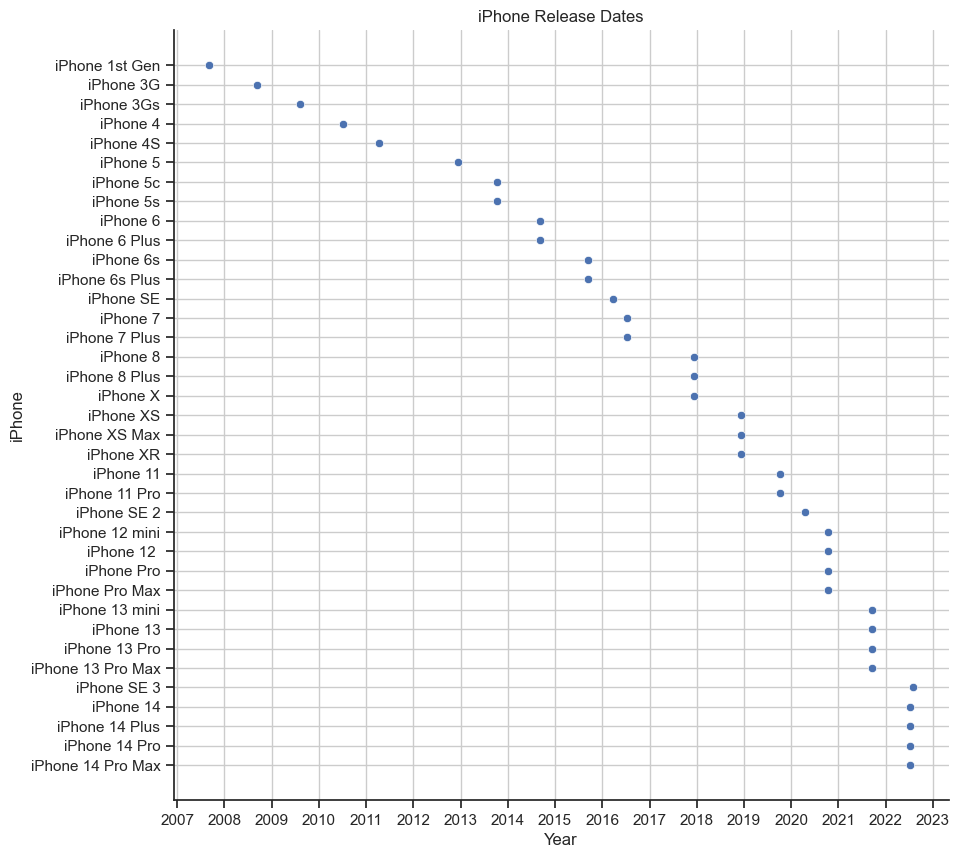

In [358]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Release_Date', y='iPhone', data=df_iPhone)

plt.xlabel("Year")
plt.ylabel("iPhone")
plt.title("iPhone Release Dates")

years = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()

### Summary / Conclusion
##### This plot visually shows each iPhone and the date they were released. This plot shows that the first iPhone was released in 2007, and Apple has released a new iPhone eveery year since 2007. Also, as time progresses Apple started to release more than one iPhone each year, with a maximum amount of iPhones released in 2020 where 5 phones were released.

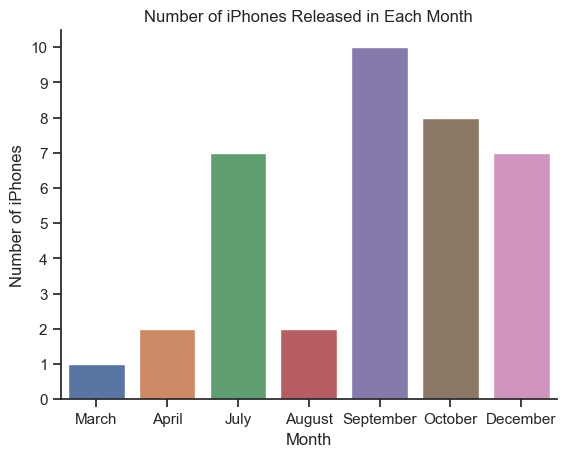

In [359]:
import calendar
release_counts_month = df_iPhone.groupby(df_iPhone['Release_Date'].dt.month)['iPhone'].count()
sns.barplot(x=[calendar.month_name[i] for i in release_counts_month.index], y=release_counts_month.values)
plt.yticks(range(0, max(release_counts_month.values)+1, 1))
plt.ylabel("Number of iPhones")
plt.xlabel("Month")
plt.title("Number of iPhones Released in Each Month")
plt.show()

### Summary / Conclusion
##### This plot shows which month iPhones have been released and the quantity of each month. iPhones have only been released in January, March, April, May, September, and October. September has the most phones released with 25 iPhones being released in September.